Figures of Tsutsui (2020, https://doi.org/10.1029/2019GL085844) including updates

In [1]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
from mce.core.forcing import RfCO2
from mce.core.climate import IrmBase
from mce.util.plot_base import PlotBase
from mce.util.plotfunc import plot_fitting, plot_tcr_ecs, plot_parms_rel

In [2]:
myplt = PlotBase()

In [3]:
with pd.HDFStore('data/cmip_normalized.h5', 'r') as store:
    df_norm_cmip5 = store['CMIP5/climate_norm1']
    df_norm_cmip6 = store['CMIP6/climate_norm1']

In [4]:
df_parms = {}

with Dataset('mce/data/parms/parms_irm-3_rtnt-tas_cmip5.nc') as ncf:
    df_parms['CMIP5'] = pd.DataFrame({
        k: v[:].filled()
        for k, v in ncf.variables.items() if k not in ['dataset']
    }, index=[
        ''.join(x.astype(str)).strip()
        for x in ncf.variables['dataset'][:]
    ])

with Dataset('mce/data/parms/parms_irm-3_rtnt-tas_cmip6.nc') as ncf:
    df_parms['CMIP6'] = pd.DataFrame({
        k: v[:].filled()
        for k, v in ncf.variables.items() if k not in ['dataset']
    }, index=[
        ''.join(x.astype(str)).strip()
        for x in ncf.variables['dataset'][:]
    ])

In [5]:
df_parms = pd.concat(df_parms).rename(
    columns={
        'time_constant_0': 'tau0',
        'time_constant_1': 'tau1',
        'time_constant_2': 'tau2',
        'amplitude_0': 'a0',
        'amplitude_1': 'a1',
        'amplitude_2': 'a2',
    }
).rename_axis(['mip', 'dataset'])

In [6]:
df_parms.loc['CMIP5'].index

Index(['ACCESS1.0', 'ACCESS1.3', 'BCC-CSM1.1', 'BNU-ESM', 'CanESM2', 'CCSM4',
       'CNRM-CM5', 'CSIRO-Mk3.6.0', 'FGOALS-s2', 'GFDL-CM3', 'GFDL-ESM2G',
       'GFDL-ESM2M', 'GISS-E2-H', 'GISS-E2-R', 'HadGEM2-ES', 'INM-CM4',
       'IPSL-CM5A-LR', 'IPSL-CM5B-LR', 'MIROC-ESM', 'MIROC5', 'MPI-ESM-LR',
       'MPI-ESM-MR', 'MPI-ESM-P', 'MRI-CGCM3', 'NorESM1-M'],
      dtype='object', name='dataset')

In [7]:
df_parms.loc['CMIP6'].index

Index(['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'BCC-CSM2-MR',
       'BCC-ESM1', 'CAMS-CSM1-0', 'CanESM5', 'CESM2', 'CESM2-FV2',
       'CESM2-WACCM', 'CESM2-WACCM-FV2', 'CNRM-CM6-1', 'CNRM-CM6-1-HR',
       'CNRM-ESM2-1', 'E3SM-1-0', 'EC-Earth3', 'EC-Earth3-Veg', 'FGOALS-f3-L',
       'FGOALS-g3', 'GFDL-CM4', 'GFDL-ESM4', 'GISS-E2-1-G', 'GISS-E2-1-H',
       'GISS-E2-2-G', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'INM-CM4-8',
       'IPSL-CM6A-LR', 'MIROC-ES2L', 'MIROC6', 'MPI-ESM1-2-HR',
       'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM',
       'SAM0-UNICON', 'UKESM1-0-LL'],
      dtype='object', name='dataset')

In [8]:
# CMIP6 models used in Tsutsui (2020)
sources_cmip6_grl_paper = [
    'BCC-CSM2-MR', 'BCC-ESM1', 'CanESM5', 'CESM2', 'CESM2-WACCM',
    'CNRM-CM6-1', 'CNRM-ESM2-1', 'GFDL-CM4', 'GISS-E2-1-G', 'GISS-E2-1-H',
    'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MIROC-ES2L', 'MRI-ESM2-0',
    'SAM0-UNICON', 'UKESM1-0-LL', 'EC-Earth3-Veg', 'CAMS-CSM1-0',
    'E3SM-1-0', 'NESM3', 'NorESM2-LM',
]

In [9]:
pd.concat([
    df_parms.groupby(level=0).mean().T,
    df_parms
    .loc['CMIP6']
    .loc[sources_cmip6_grl_paper]
    .mean()
    .to_frame('CMIP6 subset')
], axis=1).sort_index()

,CMIP5,CMIP6,CMIP6 subset
a0,0.264269,0.250616,0.238018
a1,0.336248,0.344851,0.346841
a2,0.399483,0.404533,0.415141
alpha,4.717061,4.614954,4.617508
beta,1.064268,1.096627,1.098355
ecs,3.098743,3.490789,3.650188
ecs_reg,3.289876,3.808630,3.994118
lambda,1.112338,1.000375,0.947335
lambda_reg,1.103207,1.015892,0.965241
tau0,0.975863,0.935068,0.928618


In [10]:
forcing = RfCO2()
climate = IrmBase()

## Figure 1

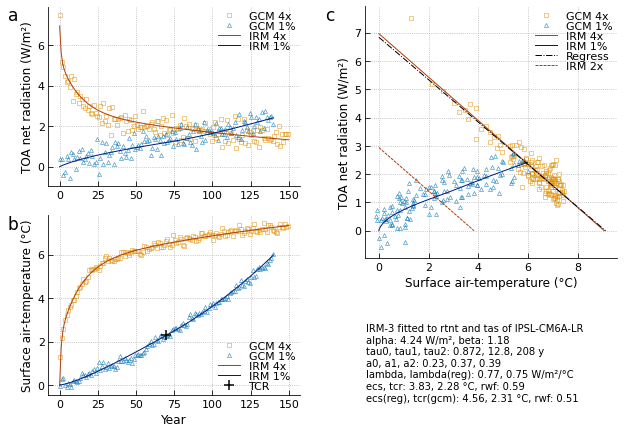

In [11]:
dataset = 'IPSL-CM6A-LR'
parms = df_parms.loc[('CMIP6', dataset)]

forcing.parms.update(
    alpha=parms['alpha'],
    beta=parms['beta'],
)
climate.parms.update(
    asj=parms[['a0', 'a1', 'a2']].values,
    tauj=parms[['tau0', 'tau1', 'tau2']].values,
    lamb=parms['lambda'],
)

df = df_norm_cmip6.loc[dataset]
gcm = {
    '4x_n': df.loc[('abrupt-4xCO2', 'rtnt')].dropna().values,
    '4x_t': df.loc[('abrupt-4xCO2', 'tas')].dropna().values,
    '1p_n': df.loc[('1pctCO2', 'rtnt')].dropna().values,
    '1p_t': df.loc[('1pctCO2', 'tas')].dropna().values,
}

names = {'var_n': 'rtnt', 'var_t': 'tas', 'dataset': dataset}
plot_fitting(myplt, gcm, forcing, climate, names, parms.to_dict())

**Figure 1.** Example of time series fitting of the top-of-atmosphere energy imbalance ($N$, **a**) and surface temperature anomaly ($T_{\mathrm{S}}$, **b**), and the resulting $N$-$T_{\mathrm{S}}$ relationship (**c**) for IPSL-CM6A-LR. The model output of the instantaneous quadrupling and 1%-per-year CO<sub>2</sub> increase experiments are labeled "GCM 4x" and "GCM 1%"; corresponding impulse response model emulations are labeled "IRM 4x" and "IRM 1%." The "IRM 2x" line is a reduced one from "IRM 4x" by a factor of $1/(2\beta)$. The line labeled "regress" is given by the conventional regression method.

## Figure 2 (updated)

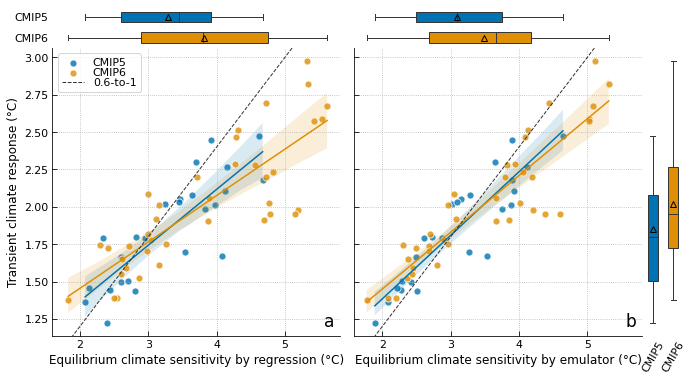

In [12]:
plot_tcr_ecs(myplt, df_parms.reset_index().set_index('dataset'))

## Figure 2 (original)

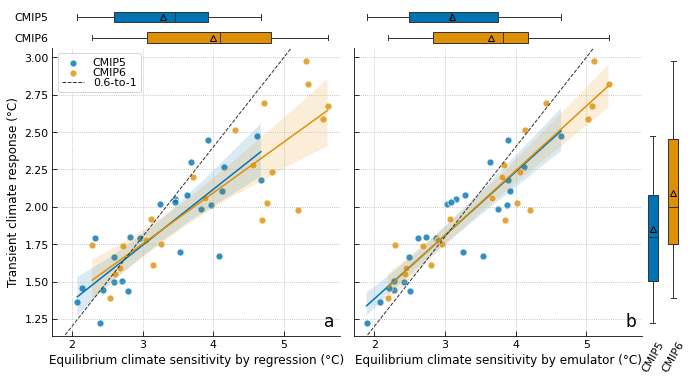

In [13]:
bl = [
    x[0] != 'CMIP6' or x[1] in sources_cmip6_grl_paper
    for x in df_parms.index
]
plot_tcr_ecs(myplt, df_parms.loc[bl].reset_index().set_index('dataset'))

**Figure 2.** Relationship between the TCR and the ECS from the CMIP5 and CMIP6 multimodel ensembles. The ECS estimates are shown for the regression method (**a**) and the emulator method (**b**). The dashed line is drawn to guide a proportional relation with a ratio of 0.6, representing an approximate multimodel mean. The color lines with plumes show regression estimates with a 95% confidence interval. The triangle markers in the marginal box plots indicate means.

## Figure 3 (updated)

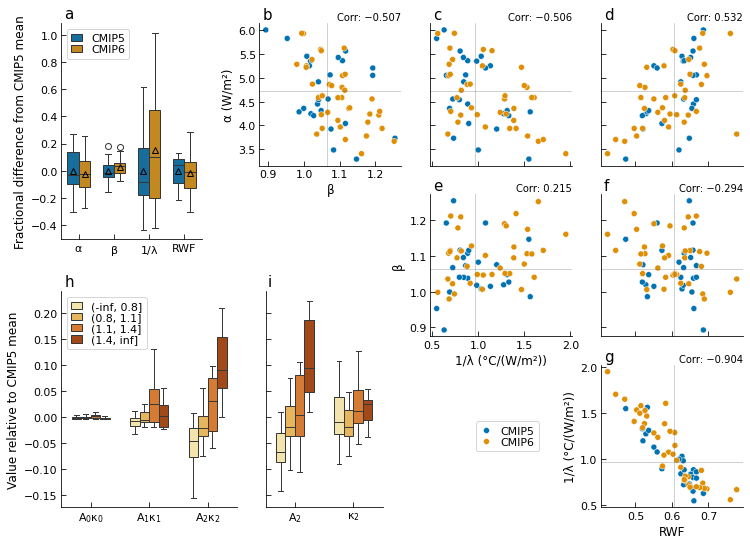

In [14]:
plot_parms_rel(myplt, df_parms.reset_index().set_index('dataset'))

## Figure 3 (original)

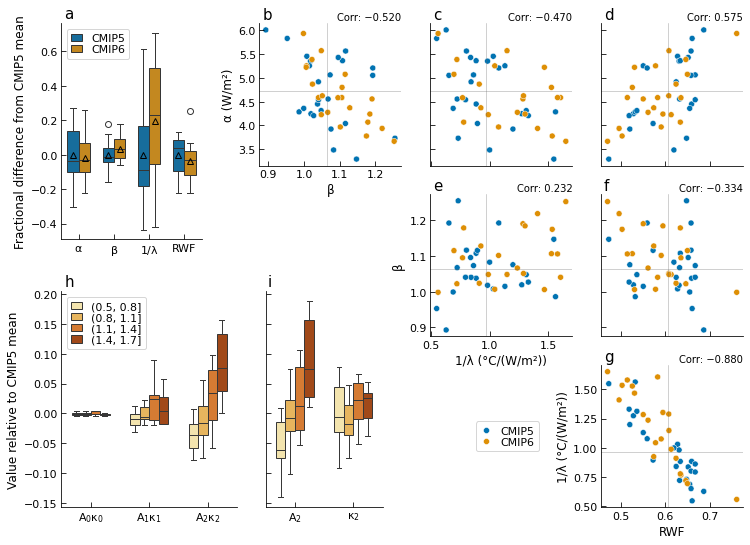

In [15]:
plot_parms_rel(
    myplt,
    df_parms.loc[bl].reset_index().set_index('dataset'),
    bins_fb=[0.5, 0.8, 1.1, 1.4, 1.7],
)

**Figure 3.** Distributions of the parameter values for forcing scale and amplification ($\alpha$ and $\beta$), feedback strength ($1/\lambda$), and ocean mixing ($\mathrm{RWF}_{\mathrm{2x}}$, labeled "RWF").
(**a**) Fractional differences from the CMIP5 means as reference, defined as $x/\mathrm{mean}(x)-1$. The triangle markers point multimodel means.
(**b** to **g**) Scatterplots for each pair of the four parameters. The text at the upper right corner describes the correlation coefficient of the selected pair. The horizontal and vertical lines indicate the reference values.
(**h**) Components of a yet to be realized warming fraction ($A_{\mathrm{S}i} \kappa_{i}$, labeled "$A_{0} \kappa_{0}$," "$A_{1} \kappa_{1}$," and "$A_{2} \kappa_{2}$") in ascending order in terms of time constant length.
(**i**) Factors associated with the longest time constant component, $A_{\mathrm{S}2}$ and $\kappa_{2}$.
Distributions are shown for each ensemble in panels **a** to **g**, and for feedback strength classes in panels **h** and **i**. The legend in panel **h** describes the ranges of the feedback strength classes in ${}^{\circ}\mathrm{C}/(\mathrm{W}/\mathrm{m}^{2})$. Outliers, which are outside of the 1.5-times interquartile range from the first/third quartile, are omitted in panels **h** and **i**.

## Figure S2

In [16]:
df_parms_mean = df_parms.groupby('mip').mean()
names_a = ['a0', 'a1', 'a2']
names_tau = ['tau0', 'tau1', 'tau2']
asj = df_parms_mean[names_a].values[:, :, None]
tauj = df_parms_mean[names_tau].values[:, :, None]

tp = np.arange(140) + 0.5
df_yrwf = pd.DataFrame(
    (
        asj * tauj / tp[None, None, :]
        * (1 - np.exp(-tp[None, None, :]/tauj))
    )
    .reshape((-1, len(tp))),
    index=pd.MultiIndex.from_product([df_parms_mean.index, names_tau]),
    columns=tp,
)
df_yrwf

0.5       1.5       2.5       3.5       4.5       5.5    \
mip                                                                      
CMIP5 tau0  0.206789  0.134962  0.095196  0.071643  0.056739  0.046722   
      tau1  0.328195  0.312848  0.298454  0.284947  0.272265  0.260351   
      tau2  0.399093  0.398315  0.397540  0.396766  0.395994  0.395224   
CMIP6 tau0  0.194114  0.124817  0.087269  0.065369  0.051653  0.042489   
      tau1  0.337134  0.322379  0.308481  0.295386  0.283040  0.271396   
      tau2  0.404263  0.403723  0.403184  0.402646  0.402109  0.401573   

               6.5       7.5       8.5       9.5    ...     130.5     131.5  \
mip                                                 ...                       
CMIP5 tau0  0.039625  0.034370  0.030335  0.027145  ...  0.001976  0.001961   
      tau1  0.249152  0.238619  0.228708  0.219376  ...  0.026465  0.026264   
      tau2  0.394457  0.393691  0.392927  0.392166  ...  0.313009  0.312450   
CMIP6 tau0  0.036018  0.031235  0.027567  0.024667  ...  0.001796  0.001782   
      tau1  0.260407  0.250033  0.240233  0.230972  ...  0.029077  0.028855   
      tau2  0.401038  0.400503  0.399970  0.399438  ...  0.341491  0.341062   

               132.5     133.5     134.5     135.5     136.5     137.5  \
mip                                                                      
CMIP5 tau0  0.001946  0.001932  0.001917  0.001903  0.001889  0.001876   
      tau1  0.026065  0.025870  0.025678  0.025488  0.025302  0.025118   
      tau2  0.311893  0.311337  0.310783  0.310229  0.309678  0.309127   
CMIP6 tau0  0.001769  0.001755  0.001742  0.001729  0.001717  0.001704   
      tau1  0.028638  0.028423  0.028212  0.028004  0.027799  0.027596   
      tau2  0.340633  0.340205  0.339777  0.339350  0.338924  0.338499   

               138.5     139.5  
mip                             
CMIP5 tau0  0.001862  0.001849  
      tau1  0.024936  0.024758  
      tau2  0.308578  0.308031  
CMIP6 tau0  0.001692  0.001680  
      tau1  0.027397  0.027201  
      tau2  0.338075  0.337651  

[6 rows x 140 columns]

In [17]:
tp2x = np.log(2.) / np.log(1.01)
df_yrwf_2x = pd.DataFrame(
    (
        asj * tauj / tp2x * (1 - np.exp(-tp2x/tauj))
    ).squeeze(),
    index=df_parms_mean.index, columns=names_tau,
)
df_yrwf_2x

,tau0,tau1,tau2
mip,,,
CMIP5,0.003702,0.049522,0.34977
CMIP6,0.003364,0.054374,0.36909


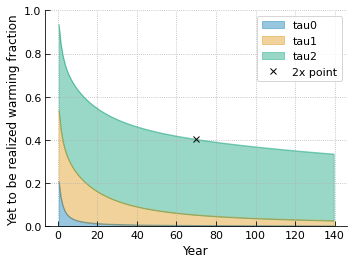

In [18]:
myplt.init_regular()
ax = myplt(0)

mip = 'CMIP5'

df_yrwf.loc[mip].T.plot(
    ax=ax, kind='area', ylim=[0, 1], legend=False, alpha=0.4,
)
ax.plot(
    tp2x, df_yrwf_2x.loc[mip].sum(),
    ls='None', marker='x', color='k', label='2x point',
)
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Yet to be realized warming fraction')
ax.grid()

**Figure S2.** Yet to be realized warming fractions in a 1%-per-year CO<sub>2</sub> increase, assuming $\beta=1$, with the CMIP5-mean response parameters for the contributions of three separate time constants labeled "tau0", "tau1", "tau2" in ascending order of their lengths. The cross marker points the total fraction at the time when the CO<sub>2</sub> concentration reaches a doubling level.